# Importing Required Libraries

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Analysis.ipynb',
 'Dataset',
 'LICENSE',
 'README.md',
 'Untitled.ipynb']

In [3]:
curr_dir=os.getcwd()
data_path=os.path.join(curr_dir,'Dataset/data.csv')

In [4]:
data=pd.read_csv(data_path)
data.shape

(4706, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job titiles        4706 non-null   object 
 1   AI Impact          4706 non-null   object 
 2   Tasks              4706 non-null   int64  
 3   AI models          4706 non-null   int64  
 4   AI_Workload_Ratio  4706 non-null   float64
 5   Domain             4706 non-null   object 
 6   domain_new         4706 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 257.5+ KB


In [6]:
data=data.rename(columns={'Job titiles':'Job title','domain_new':'domain'})

In [7]:
data.head()

,Job title,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain,domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy,Administrative & Clerical
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare,Medical & Healthcare


In [8]:
data.describe()

,Tasks,AI models,AI_Workload_Ratio
count,4706.000000,4706.000000,4706.000000
mean,400.708032,1817.678071,inf
std,311.564781,1086.853037,NaN
min,1.000000,0.000000,0.036585
25%,161.000000,1085.250000,0.137271
50%,270.000000,1577.500000,0.199281
75%,608.750000,2273.000000,0.260572
max,1387.000000,5666.000000,inf


In [9]:
data['AI_Workload_Ratio'].replace([np.inf,-np.inf],np.nan,inplace=True)

In [10]:
data.describe()

,Tasks,AI models,AI_Workload_Ratio
count,4706.000000,4706.000000,4699.000000
mean,400.708032,1817.678071,0.204619
std,311.564781,1086.853037,0.076547
min,1.000000,0.000000,0.036585
25%,161.000000,1085.250000,0.137262
50%,270.000000,1577.500000,0.198885
75%,608.750000,2273.000000,0.260450
max,1387.000000,5666.000000,1.000000


In [11]:
data['domain'].unique()

array(['Communication & PR', 'Data & IT', 'Administrative & Clerical',
       'Medical & Healthcare', 'Leadership & Strategy', 'Law Enforcement',
       'Construction', 'Sales & Marketing', 'Hospitality',
       'Supply Chain & Logistics'], dtype=object)

In [12]:
data['AI Impact']=data['AI Impact'].str.strip('%').astype(float)/100

In [13]:
data.drop_duplicates()

,Job title,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain,domain
0,Communications Manager,0.98,365,2546,0.143362,Communication & PR,Communication & PR
1,Data Collector,0.95,299,2148,0.139199,Data & IT,Data & IT
2,Data Entry,0.95,325,2278,0.142669,Administrative & Clerical,Administrative & Clerical
3,Mail Clerk,0.95,193,1366,0.141288,Leadership & Strategy,Administrative & Clerical
4,Compliance Officer,0.92,194,1369,0.141709,Medical & Healthcare,Medical & Healthcare
...,...,...,...,...,...,...,...
4701,Singer,0.05,686,2798,0.245175,Data & IT,Communication & PR
4702,Airport,0.05,556,2206,0.252040,Administrative & Clerical,Supply Chain & Logistics
4703,Director,0.05,1316,4695,0.280298,Leadership & Strategy,Leadership & Strategy
4704,Nurse,0.05,710,2594,0.273709,Medical & Healthcare,Medical & Healthcare


In [14]:
domain_impact=data.groupby('domain')['AI Impact'].mean().sort_values(ascending=False)
domain_impact

domain
Data & IT                    0.421101
Law Enforcement              0.343919
Sales & Marketing            0.332720
Supply Chain & Logistics     0.323419
Administrative & Clerical    0.312176
Construction                 0.279802
Medical & Healthcare         0.266571
Leadership & Strategy        0.254494
Hospitality                  0.246232
Communication & PR           0.224908
Name: AI Impact, dtype: float64

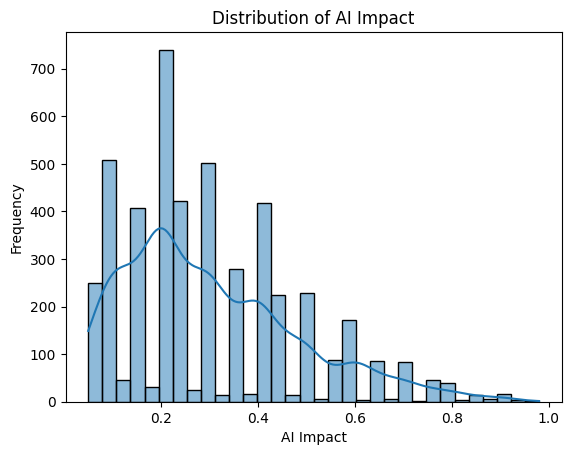

In [15]:
sns.histplot(data['AI Impact'], kde=True)
plt.title('Distribution of AI Impact')
plt.xlabel('AI Impact')
plt.ylabel('Frequency')
plt.show()

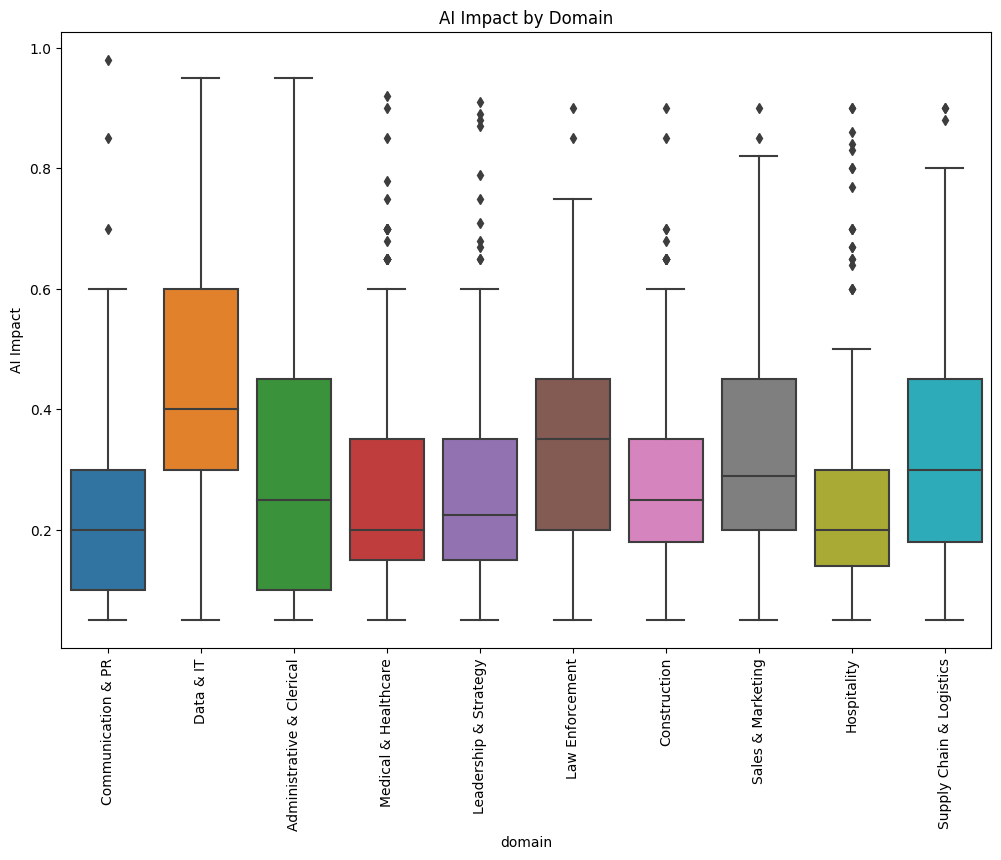

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='domain', y='AI Impact', data=data)
plt.xticks(rotation=90)
plt.title('AI Impact by Domain')
plt.show()

In [17]:
data.drop(columns='Domain')

,Job title,AI Impact,Tasks,AI models,AI_Workload_Ratio,domain
0,Communications Manager,0.98,365,2546,0.143362,Communication & PR
1,Data Collector,0.95,299,2148,0.139199,Data & IT
2,Data Entry,0.95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,0.95,193,1366,0.141288,Administrative & Clerical
4,Compliance Officer,0.92,194,1369,0.141709,Medical & Healthcare
...,...,...,...,...,...,...
4701,Singer,0.05,686,2798,0.245175,Communication & PR
4702,Airport,0.05,556,2206,0.252040,Supply Chain & Logistics
4703,Director,0.05,1316,4695,0.280298,Leadership & Strategy
4704,Nurse,0.05,710,2594,0.273709,Medical & Healthcare


In [18]:
numeric_df = data.select_dtypes(include=[np.number])
corr=numeric_df.corr(method='pearson')
corr

,AI Impact,Tasks,AI models,AI_Workload_Ratio
AI Impact,1.000000,-0.419760,-0.413176,-0.287871
Tasks,-0.419760,1.000000,0.928350,0.631305
AI models,-0.413176,0.928350,1.000000,0.346893
AI_Workload_Ratio,-0.287871,0.631305,0.346893,1.000000


In [19]:
def impact_level(impact):
    if impact >= 0.9:
        return 'Extreme'
    elif 0.7 <= impact < 0.9:
        return 'High'
    elif 0.45 <= impact < 0.7:
        return 'Medium'
    else:
        return 'Low'

data['Impact_Level'] = data['AI Impact'].apply(impact_level)


In [20]:
data['Impact_Level'].value_counts()

Impact_Level
Low        3668
Medium      824
High        194
Extreme      20
Name: count, dtype: int64

In [21]:
data['Log_Tasks'] = np.log1p(data['Tasks'])
data['Log_Models'] = np.log1p(data['AI models'])

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
poly_features = poly.fit_transform(data[['Tasks', 'AI models']])
poly_df = pd.DataFrame(poly_features, columns=['1', 'Tasks', 'AI models', 'Tasks_AI models'])
data = pd.concat([data, poly_df], axis=1)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X = data[['Tasks', 'AI models', 'AI_Workload_Ratio', 'Log_Tasks', 'Log_Models', 'Tasks_AI models']]
y = data['Impact_Level']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Accuracy Score:", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

     Extreme       0.50      0.20      0.29         5
        High       0.45      0.25      0.32        68
         Low       0.87      0.92      0.90      1093
      Medium       0.58      0.50      0.54       246

    accuracy                           0.82      1412
   macro avg       0.60      0.47      0.51      1412
weighted avg       0.80      0.82      0.80      1412

Confusion Matrix:
 [[   1    0    3    1]
 [   0   17   36   15]
 [   1   10 1010   72]
 [   0   11  112  123]]
Accuracy Score: 0.8151558073654391


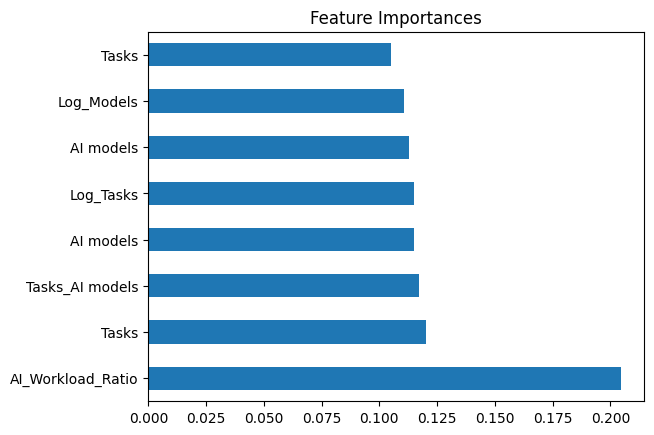

In [24]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

In [ ]:
# !pip install mplcursors